# [機械学習帳の「非階層的クラスタリング」](https://chokkan.github.io/mlnote/unsupervised/01kmeans.html)の最後の確認問題の解答例←[ChatGPTに相談](https://chat.openai.com/share/b61aa9df-4c59-411c-84a8-a7b2325b66cb)して作成

---



## csvファイルを読み込んでk-means法でクラスタリング（scikit-learnを使用）

SSDSE-C-2023.csvファイルのデータをsklearn.cluster.KMeansクラスで分析するためのプログラムを書いて下さい。データファイルの構成は次の通りです。１行目は項目コード、２行目は項目名（家計消費の対象となる品目名）です。３行目は分析に使用しないデータで、4行目から50行目までの47行が分析対象のデータです。1列目は地域コード、2列目は都道府県名、3列目は都道府県庁所在市の名前で、4列目から229列目までの226列が分析対象のデータです。消費行動が類似している都道府県庁所在市のクラスタを作ることが目標です。欠損データはありませんが、品目別支出金額は標準化の必要があると思います。

In [ ]:
# データを読み込みます。
df = pd.read_csv('SSDSE-C-2023.csv', header=None, encoding='cp932')

# 分析対象のデータを抽出します。3行目までのデータを削除し、1列目から3列目までのデータも削除します。
df = df.iloc[3:, 3:]

# データを標準化します。
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# KMeans クラスタリングを行います。
# kmeans = KMeans(n_clusters=10, random_state=0)  # クラスタ数は適切に調整してください。
kmeans = KMeans(n_clusters=10)  # クラスタ数は適切に調整してください。
kmeans.fit(df_scaled)

# 結果のクラスタ番号を表示します。
df['cluster'] = kmeans.labels_
print(df['cluster'])

3     9
4     9
5     1
6     1
7     1
8     1
9     1
10    8
11    8
12    8
13    3
14    3
15    3
16    3
17    1
18    2
19    2
20    2
21    8
22    8
23    0
24    3
25    0
26    0
27    6
28    6
29    6
30    6
31    6
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    4
42    0
43    7
44    7
45    7
46    7
47    7
48    7
49    5
Name: cluster, dtype: int32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## エルボー法で適切なKを求める

K-meansクラスタリングを異なるクラスタ数 K で実行し、横軸にクラスタ数、縦軸にK-meansの目的関数の値、すなわちクラスタ内平方和（WCSS: within-cluster sum-of-squares）をプロットしたグラフを描画せよ。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

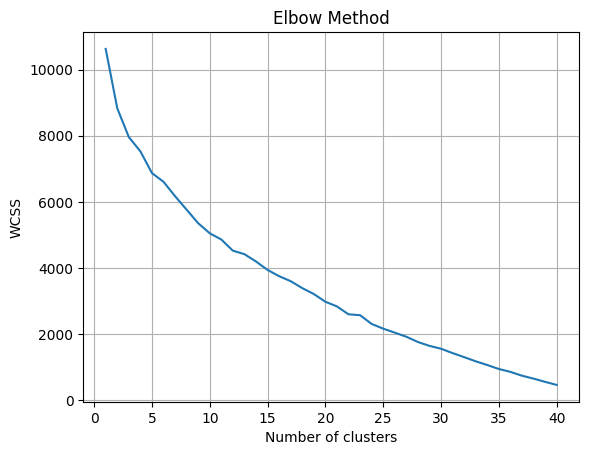

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# データを読み込みます。
df = pd.read_csv('SSDSE-C-2023.csv', header=None, encoding='cp932')

# 分析対象のデータを抽出します。3行目までのデータを削除し、1列目から3列目までのデータも削除します。
df = df.iloc[3:, 3:]

# データを標準化します。
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# 異なるクラスタ数で KMeans クラスタリングを実行し、WCSSを計算します。
wcss = []
max_clusters = 40  # 最大クラスタ数は適切に設定してください。
for i in range(1, max_clusters+1):
    # kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# クラスタ数に対するWCSSをプロットします。
plt.plot(range(1, max_clusters+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## 各クラスタに属する都道府県庁所在地の表示

クラスタリング結果の各クラスタに対して、それぞれ所属する都道府県庁所在地を知りたいのですが、どうすればよいですか？

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データを読み込みます。
df = pd.read_csv('SSDSE-C-2023.csv', header=None, encoding='cp932')

# 都道府県庁所在地の名前を保存します。
cities = df.iloc[3:, 2]

# 分析対象のデータを抽出します。3行目までのデータを削除し、1列目から3列目までのデータも削除します。
df = df.iloc[3:, 3:]

# データを標準化します。
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# KMeans クラスタリングを行います。
kmeans = KMeans(n_clusters=10, random_state=0)  # クラスタ数は適切に調整してください。
kmeans.fit(df_scaled)

# 結果のクラスタ番号を都道府県庁所在地に付与します。
cities_clustered = pd.DataFrame({'City': cities, 'Cluster': kmeans.labels_})

# クラスタ番号ごとに都道府県庁所在地を表示します。
for i in range(kmeans.n_clusters):
    print(f'Cluster {i}:')
    print(cities_clustered[cities_clustered['Cluster'] == i]['City'])
    print('\n')

Cluster 0:
33     鳥取市
34     松江市
37     山口市
42     福岡市
43     佐賀市
44     長崎市
45     熊本市
46     大分市
47     宮崎市
48    鹿児島市
Name: City, dtype: object


Cluster 1:
19    金沢市
27    大津市
28    京都市
29    大阪市
30    神戸市
31    奈良市
Name: City, dtype: object


Cluster 2:
3    札幌市
4    青森市
5    盛岡市
7    秋田市
Name: City, dtype: object


Cluster 3:
6      仙台市
9      福島市
10     水戸市
11    宇都宮市
12     前橋市
21     甲府市
22     長野市
Name: City, dtype: object


Cluster 4:
49    那覇市
Name: City, dtype: object


Cluster 5:
13    さいたま市
14      千葉市
15    東京都区部
16      横浜市
Name: City, dtype: object


Cluster 6:
8     山形市
17    新潟市
18    富山市
Name: City, dtype: object


Cluster 7:
32    和歌山市
35     岡山市
36     広島市
38     徳島市
39     高松市
40     松山市
41     高知市
Name: City, dtype: object


Cluster 8:
20    福井市
Name: City, dtype: object


Cluster 9:
23     岐阜市
24     静岡市
25    名古屋市
26      津市
Name: City, dtype: object




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
